In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('C:\projects')

In [3]:
data=pd.read_csv('Bengaluru_House_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
data.drop(['society'],axis=1,inplace=True)

In [7]:
data.drop(['availability'],axis=1,inplace=True)

In [8]:
data.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
area_type     12710 non-null object
location      12710 non-null object
size          12710 non-null object
total_sqft    12710 non-null object
bath          12710 non-null float64
balcony       12710 non-null float64
price         12710 non-null float64
dtypes: float64(3), object(4)
memory usage: 794.4+ KB


In [11]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [12]:
data['bhk']=data['size'].apply(lambda x:int(x.split()[0]))

In [13]:
data=data.drop(['size'],axis=1)
data.head()


,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [14]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
data[data.total_sqft.apply(is_float)].head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [17]:
data[~data.total_sqft.apply(is_float)].head(8)

,area_type,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Yelahanka,1120 - 1145,2.0,0.0,48.130,2


In [18]:
def cov_sqft_to_num(x):
    num=x.split('-')
    if len(num)==2:
        return (float(num[0])+float(num[1]))/2
    else:
        try:
            return float(x)
        except:
            return None

In [19]:
df=data.copy()
df.total_sqft=df.total_sqft.apply(cov_sqft_to_num)

In [20]:
df.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
total_sqft                    2475
bath                             4
balcony                          0
price                          186
bhk                              4
Name: 30, dtype: object

In [21]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [22]:
df['pri_per_sqft']=df.price*100000/df.total_sqft

In [23]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,pri_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [24]:
len(df.location.unique())

1265

In [25]:
loc_count=df.groupby('location').location.agg('count').sort_values(ascending=False)
loc_count

location
Whitefield                                      514
Sarjapur  Road                                  372
Electronic City                                 300
Kanakpura Road                                  261
Thanisandra                                     231
Yelahanka                                       206
Uttarahalli                                     186
Hebbal                                          173
Raja Rajeshwari Nagar                           168
Marathahalli                                    164
7th Phase JP Nagar                              147
Bannerghatta Road                               144
Hennur Road                                     142
Haralur Road                                    135
Electronic City Phase II                        130
Rajaji Nagar                                     99
Chandapura                                       98
Bellandur                                        91
Hoodi                                            86
Ele

In [26]:
len(loc_count[loc_count<=10])

1028

In [27]:
type(loc_count[loc_count<=10])

pandas.core.series.Series

In [28]:
loc=list(loc_count[loc_count<=10].index)
len(loc)

1028

In [29]:
df.location=df.location.apply(lambda x:'other'if x in loc else x)

In [30]:
len(df.location.unique())

238

In [31]:
df.sample(10)

,area_type,location,total_sqft,bath,balcony,price,bhk,pri_per_sqft
4783,Built-up Area,Sarjapur Road,1750.0,3.0,3.0,99.00,3,5657.142857
5997,Super built-up Area,Malleshpalya,1430.0,2.0,1.0,69.50,3,4860.139860
2692,Super built-up Area,Devanahalli,1080.0,2.0,0.0,53.35,2,4939.814815
220,Super built-up Area,Sarjapur Road,1787.0,3.0,2.0,125.00,3,6994.963626
9080,Plot Area,Binny Pete,1282.0,3.0,2.0,178.00,3,13884.555382
10343,Super built-up Area,Sarjapur Road,994.0,2.0,2.0,45.00,2,4527.162978
3526,Plot Area,Chikka Tirupathi,1616.0,3.0,0.0,95.00,3,5878.712871
12292,Built-up Area,other,2400.0,3.0,0.0,185.00,4,7708.333333
6606,Plot Area,other,1200.0,7.0,3.0,95.00,9,7916.666667
1401,Super built-up Area,Raja Rajeshwari Nagar,1105.0,2.0,1.0,65.00,2,5882.352941


In [32]:
df[df.total_sqft/df.bhk<300].head()

,area_type,location,total_sqft,bath,balcony,price,bhk,pri_per_sqft
58,Plot Area,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,other,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268


In [33]:
df[df.total_sqft/df.bhk<300].shape

(655, 8)

In [34]:
df=df[~(df.total_sqft/df.bhk<300)]

In [35]:
df.shape

(12055, 8)

In [36]:
df.pri_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: pri_per_sqft, dtype: float64

In [37]:
def remove_out(df):
    df_out=pd.DataFrame()
    for keys,sub_df in df.groupby('location'):
        m=np.mean(sub_df.pri_per_sqft)
        std=np.std(sub_df.pri_per_sqft)
        red_df=sub_df[(sub_df.pri_per_sqft>=(m-std))&(sub_df.pri_per_sqft<(m+std))]
        df_out=pd.concat([df_out,red_df],ignore_index=True)
    return df_out    

In [38]:
new_df=remove_out(df)

In [39]:
new_df.shape

(9849, 8)

In [40]:
new_df.sample(10)

,area_type,location,total_sqft,bath,balcony,price,bhk,pri_per_sqft
3306,Plot Area,ITPL,1200.0,3.0,1.0,56.12,3,4676.666667
9350,Built-up Area,other,1255.0,2.0,1.0,60.00,3,4780.876494
7674,Super built-up Area,other,1415.0,3.0,3.0,78.00,3,5512.367491
8385,Super built-up Area,other,1100.0,2.0,2.0,38.00,2,3454.545455
3050,Built-up Area,Horamavu Agara,1106.0,2.0,1.0,43.09,2,3896.021700
4294,Super built-up Area,Kodihalli,2500.0,4.0,1.0,260.00,3,10400.000000
9121,Super built-up Area,other,500.0,1.0,1.0,16.00,1,3200.000000
5629,Built-up Area,Ramamurthy Nagar,1334.0,2.0,1.0,67.00,2,5022.488756
2321,Super built-up Area,Gottigere,950.0,2.0,1.0,38.00,2,4000.000000
5666,Super built-up Area,Sahakara Nagar,1219.0,2.0,2.0,48.00,2,3937.653815


In [41]:
def plot(location):
    plt.figure(figsize=(10,8))
    bhk2_price=new_df[(new_df['location']==location)&(new_df.bhk==2)].price
    bhk2_sqft=new_df[(new_df['location']==location)&(new_df.bhk==2)].total_sqft
    
    bhk3_price=new_df[(new_df['location']==location)&(new_df.bhk==3)].price
    bhk3_sqft=new_df[(new_df['location']==location)&(new_df.bhk==3)].total_sqft
    
    
    plt.scatter(bhk2_sqft,bhk2_price,marker='+',color='red',label='2_bhk')
    plt.scatter(bhk3_sqft,bhk3_price,marker='o',color='yellow',label='3_bhk')
    
    plt.title(location)
    plt.xlabel('sqft')
    plt.ylabel('price')
    plt.legend()
    
    plt.show()

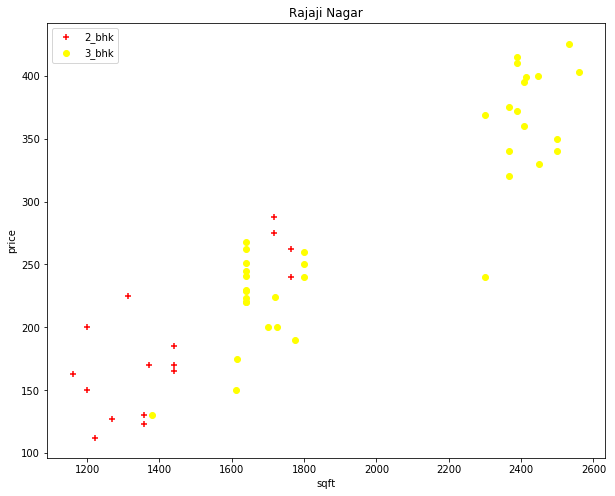

In [42]:
plot('Rajaji Nagar')

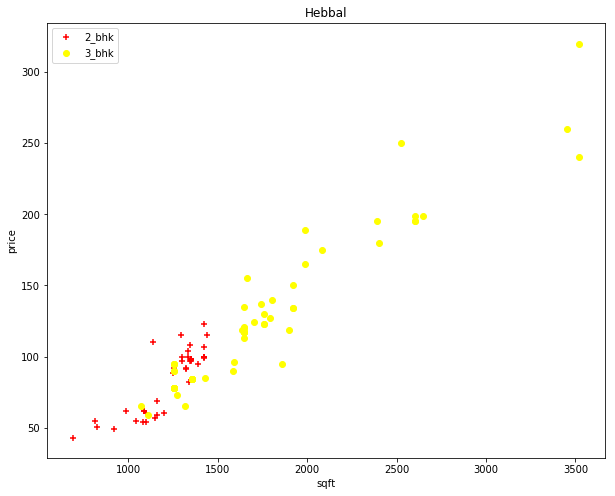

In [43]:
plot('Hebbal')

In [44]:
def avg(df):
    ex_ind=np.array([])
    for loc,loc_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.pri_per_sqft),
                'std':np.std(bhk_df.pri_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in loc_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                ex_ind=np.append(ex_ind,bhk_df[bhk_df.pri_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(ex_ind)

In [45]:
new_df=avg(new_df)

In [46]:
new_df.shape

(7038, 8)

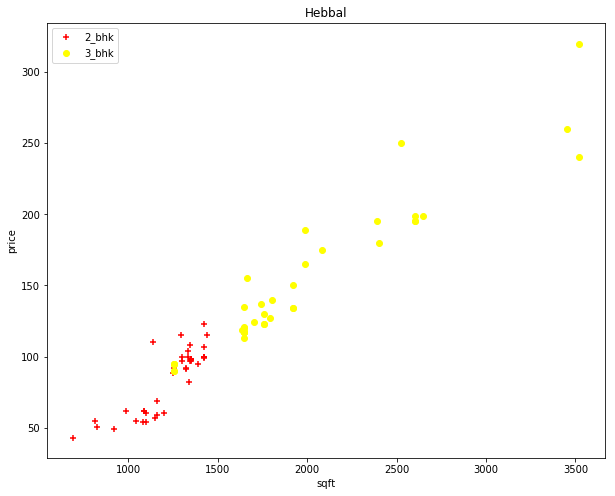

In [47]:
plot('Hebbal')

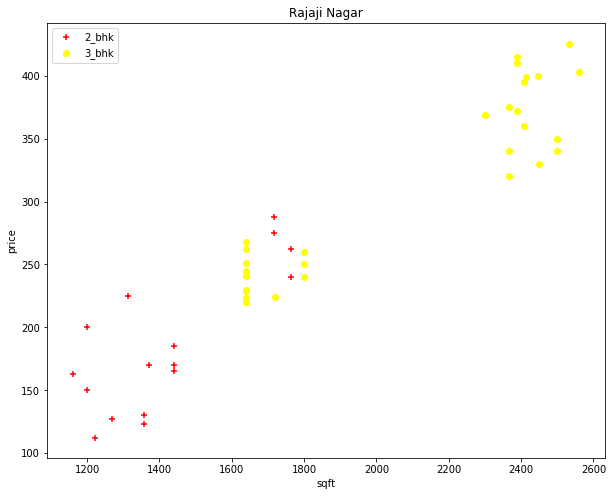

In [48]:
plot('Rajaji Nagar')

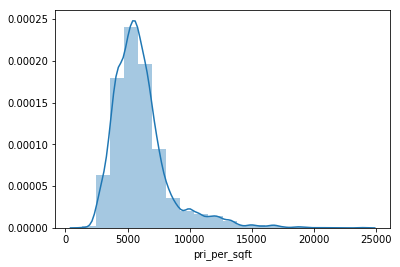

In [49]:
sns.distplot(new_df.pri_per_sqft,bins=20)

In [50]:
new_df[new_df.bath>8]

,area_type,location,total_sqft,bath,balcony,price,bhk,pri_per_sqft
3592,Built-up Area,KR Puram,4600.0,9.0,2.0,200.0,9,4347.826087
4886,Super built-up Area,Mico Layout,5000.0,9.0,3.0,210.0,9,4200.000000
5407,Built-up Area,Raja Rajeshwari Nagar,3600.0,9.0,3.0,240.0,9,6666.666667
7718,Super built-up Area,other,5000.0,9.0,3.0,360.0,11,7200.000000
8083,Super built-up Area,other,11338.0,9.0,1.0,1000.0,6,8819.897689
9269,Super built-up Area,other,5425.0,13.0,0.0,275.0,13,5069.124424


C:\Python\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


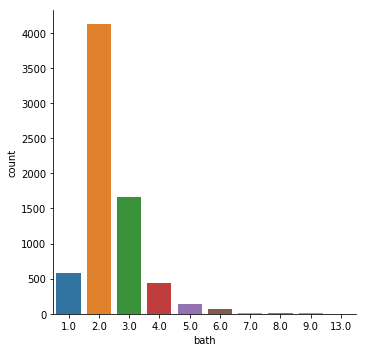

In [51]:
sns.factorplot('bath',data=new_df,kind='count')

In [52]:
new_df.bath.value_counts()

2.0     4121
3.0     1667
1.0      574
4.0      435
5.0      139
6.0       70
7.0       16
8.0       10
9.0        5
13.0       1
Name: bath, dtype: int64

In [53]:
new_df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,pri_per_sqft
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000
2,Plot Area,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509
5,Super built-up Area,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,4540.654699


In [93]:
dum1=pd.get_dummies(new_df.location)

In [94]:
dum2=pd.get_dummies(new_df.area_type)

In [100]:
df0=pd.concat([new_df.drop(['location','area_type'],axis=1),dum1.drop(['other'],axis=1)],axis=1)
df1=pd.concat([df0,dum2.drop(['Carpet  Area'],axis=1)],axis=1)

In [104]:
df1.head()

,total_sqft,bath,balcony,price,bhk,pri_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Plot Area,Super built-up Area
1,1250.0,2.0,2.0,40.0,2,3200.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1200.0,2.0,2.0,83.0,2,6916.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1170.0,2.0,2.0,40.0,2,3418.803419,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1425.0,2.0,2.0,65.0,3,4561.403509,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,947.0,2.0,2.0,43.0,2,4540.654699,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
df1.shape


(7038, 246)

In [106]:
x=df1.drop(['price'],axis=1)

In [107]:
y=df1.price

In [108]:
from sklearn.model_selection import train_test_split

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [126]:
from sklearn.linear_model import  LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)
lreg.score(x_test,y_test)

0.8908850398705247

In [127]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [146]:
cv=ShuffleSplit(n_splits=5,test_size=.2)
cross_val_score(LinearRegression(),x,y,cv=cv).mean()

0.9176452000766677

In [2]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [1]:
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
def find_best_model(x,y):
    params={
        'lin_reg':{
            'model': LinearRegression(),
            'para' :{
                'normalize':[True,False]
            }
        },
        'rand_reg':{
            'model': RandomForestRegressor(),
            'para':{
                'n_estimators':[5,8,9,15],
                'max_depth':[1,2,3,4]
            }
        }
        
    }
    score=[]
    cv=ShuffleSplit(n_splits=5,test_size=.2)
    for nam,config in params.items():
        gs=GridSearchCV(config['model'],config['para'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        score.append({
            'model':nam,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        print(gs.best_score_)
    
    
    return pd.DataFrame(score)

In [3]:
find_best_model(x,y)

NameError: name 'x' is not defined